Pt.1 
Sitk 
Metrics
DRR
MIP
Histogram
Pt.2 
Image pyramids
Laplaciano
Gaussiana
Differenza delle gaussiane
Laplaciano delle gaussiane
Hessiano
Convoluzione
Filtraggio

  <style>
    .container {
      display: flex;
      justify-content: space-between;
      align-items: center;
    }

    .text {
      width: 95%;
       text-align: center;
    }

    .image {
      width: 5%;
      text-align: center; 
    }

    
    .image img {
      max-width: 100%;
      height: auto;
    }
  </style> 
  
  <div class="container">
    <div class="image">
      <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Logo_KIT.svg/1200px-Logo_KIT.svg.png" width=100 height=50/>
    </div>
        <div class="text">
      <h1> Medical Image Processing and Navigation 2024/25</h1>
    </div>
  </div>

---

<center>
<h2>Python basics in medical images</h2> 
<img src="https://media.licdn.com/dms/image/D5612AQF2rxt03lwzfA/article-cover_image-shrink_720_1280/0/1687943342868?e=2147483647&v=beta&t=6LHuw7K4S4DmDMoormjw5SrqrlD2Turi1TRdvk52zgM" width=400 height=200/>


---

<center>
Lecturer: <b><i>Ciro Benito Raggio</i></b> 
<br/>
<a><href>https://www.ibt.kit.edu/english/Raggio_C.php</href></a>

# Read and plot 3D images with Python
What will we use? 
- **SimpleITK** is an image analysis toolkit with a large number of components supporting general filtering operations, image segmentation and registration.
- **Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **Numpy** is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
- **Open-CV** is the largest Computer Vision library in the world. It's used worldwide: in the world's biggest companies, underwater, and in space.
- **PyTorch** is a Python package that provides two high-level features: 
    - Tensor computation (like NumPy) with strong GPU acceleration
    - Deep neural networks dedicated methods and utilities

Important things in SimpleITK:

Internal axis are (X,Y,Z). It means, when we get numpy array dimensions are (Z,Y,X) i.e. shifted.
When we define orientation, orientation string is according to internal axis.
The orientation string is set with the latest letter, e.g. :

- **"RPS"** (left-to-Right or Sagittal, anterior-to-Posterior or Coronal, inferior-to-Superior or Axial)

- **"PSR"** (inferior-to-Superior or Axial, anterior-to-Posterior or Coronal, left-to-Right or Sagittal)

Quick review:

<table style="width: 100%; border-collapse: collapse; border-style: hidden;" border="0">
    <tbody>
        <tr>
            <td style="width: 100%;">
                <img style="display: block; margin-left: auto; margin-right: auto;" src="./assets/PythonBasicsLecture/SAC.gif" />
                    <p style="text-align: center;"><span style="color: #00ff00;">Axial plane</span></p>
                <p style="text-align: center;"><span style="color: #ff0000;">Sagittal plane</span></p>
                <p style="text-align: center;"><span style="color: #333399;">Coronal plane</span></p>
            </td>
        </tr>
    </tbody>
</table>

[Full video](https://www.youtube.com/watch?v=2J8bDkALBic&ab_channel=3D4MedicalFromElsevier)

---

In [14]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import torch 
ct_path='assets/PythonBasicsLecture/data/img0001.nii.gz'
ct_label_path='assets/PythonBasicsLecture/data/label0001.nii.gz'

# CT
ct_sitk  = sitk.ReadImage(ct_path, sitk.sitkFloat32) # Reading CT
ct_array = sitk.GetArrayFromImage(ct_sitk) # Converting sitk_metadata to image array

# Label
label_sitk = sitk.ReadImage(ct_label_path,sitk.sitkInt32) # Reading label
label_array = sitk.GetArrayFromImage(label_sitk) 

print(f'Original CT shape {ct_array.shape}, Original CT Label shape {label_array.shape}')

Original CT shape (147, 512, 512), Original CT Label shape (147, 512, 512)


### The volume has 148 (0-147) slices measuring 512x512px.

## Let's visualize the images

<h5>We can consider the 3D volume as a series of 2D images in succession.
We also extracted an array, so we can use indexing to retrieve a very specific slice, for example:</h5>

```python
image_array[0, :, :] # the first slice of the volume on the first view
image_array[:, :, -1] # the last slice of the volume on the last view
```

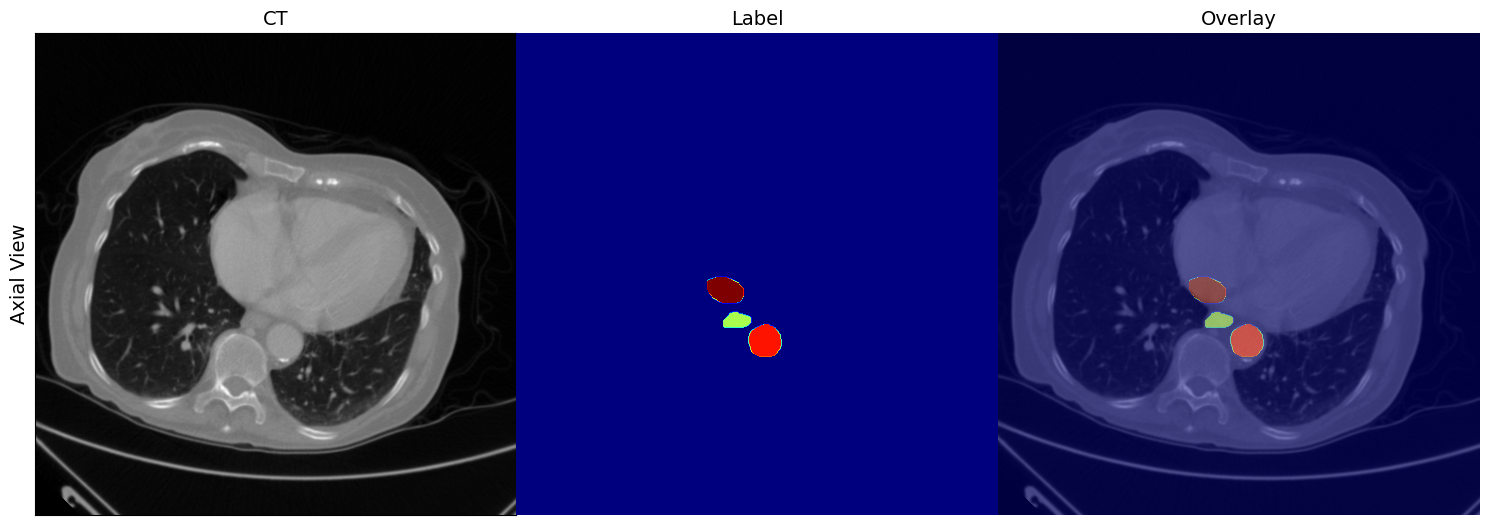

In [15]:
slice_number = -1

ct_slice = np.squeeze(ct_array[slice_number, :, :])

f, axarr = plt.subplots(1,3,figsize=(15,15))
axarr[0].imshow(ct_slice, cmap='gray',origin='lower')
axarr[0].set_ylabel('Axial View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(np.squeeze(label_array[slice_number, :, :]), cmap='jet',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Label',fontsize=14)

axarr[2].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',alpha=1,origin='lower')
axarr[2].imshow(np.squeeze(label_array[slice_number, :, :]),cmap='jet',alpha=0.5,origin='lower')
axarr[2].axis('off')
axarr[2].set_title('Overlay',fontsize=14)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

### Using slicing method to display other views.

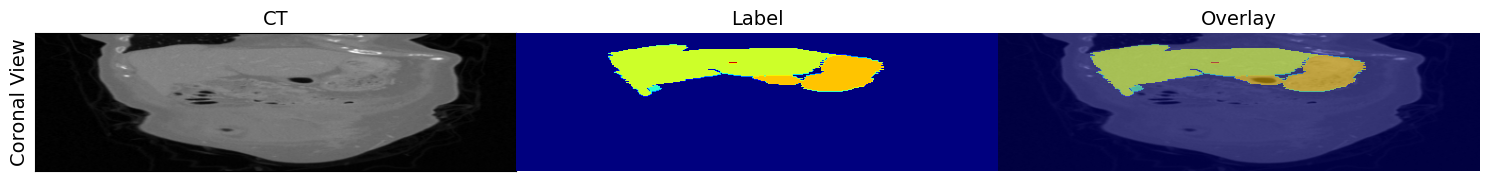

In [16]:
slice_number = -160
ct_slice = np.squeeze(ct_array[:, slice_number, :])

f, axarr = plt.subplots(1,3,figsize=(15,15))
axarr[0].imshow(ct_slice, cmap='gray',origin='lower')
axarr[0].set_ylabel('Coronal View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(np.squeeze(label_array[:, slice_number, :]), cmap='jet',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Label',fontsize=14)

axarr[2].imshow(ct_slice, cmap='gray',alpha=1,origin='lower')
axarr[2].imshow(np.squeeze(label_array[:, slice_number, :]),cmap='jet',alpha=0.5,origin='lower')
axarr[2].axis('off')
axarr[2].set_title('Overlay',fontsize=14)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

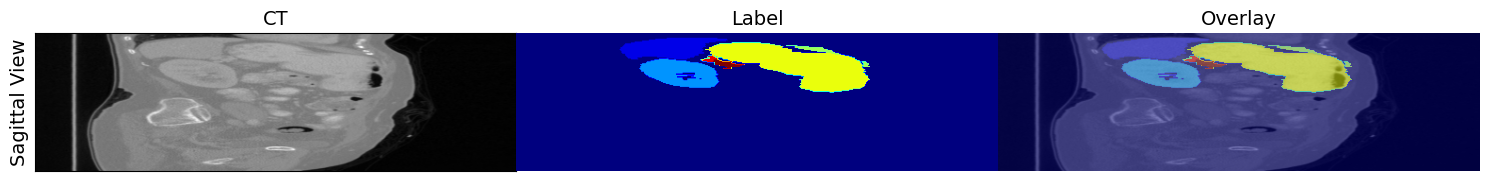

In [17]:
ct_slice = np.squeeze(ct_array[:, :, slice_number])

f, axarr = plt.subplots(1,3,figsize=(15,15))
axarr[0].imshow(ct_slice, cmap='gray',origin='lower')
axarr[0].set_ylabel('Sagittal View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(np.squeeze(label_array[:, :, slice_number]), cmap='jet',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Label',fontsize=14)

axarr[2].imshow(ct_slice, cmap='gray',alpha=1,origin='lower')
axarr[2].imshow(np.squeeze(label_array[:, :, slice_number]),cmap='jet',alpha=0.5,origin='lower')
axarr[2].axis('off')
axarr[2].set_title('Overlay',fontsize=14)
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

### Inspect a volume with SimpleITK

In [18]:
print("Size:", ct_sitk.GetSize())  
print(f"Voxel spacing: {ct_sitk.GetSpacing()} [mm]" )  
print("Origin:", ct_sitk.GetOrigin())  
print("Cosines direction:", ct_sitk.GetDirection())  

pixel_type = ct_sitk.GetPixelIDTypeAsString()  
print("Pixel type:", pixel_type)
print("Voxel min value:", sitk.GetArrayFromImage(ct_sitk).min())  
print("Voxel max value:", sitk.GetArrayFromImage(ct_sitk).max())  

num_voxel = ct_sitk.GetWidth() * ct_sitk.GetHeight() * ct_sitk.GetDepth()
print("Voxels total:", num_voxel)

Size: (512, 512, 147)
Voxel spacing: (0.66796875, 0.66796875, 3.0) [mm]
Origin: (0.0, 0.0, 0.0)
Cosines direction: (1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
Pixel type: 32-bit float
Voxel min value: -1024.0
Voxel max value: 2639.0
Voxels total: 38535168


### Write a new volume with Simple ITK

In [19]:
sitk.WriteImage(ct_sitk, "./ct.nrrd")

# Metrics

## Mean Absolute Error (MAE)

Let's imagine that the real value is the value of the pixel, while the predicted one is the prediction of a neural network that tries to construct the image. How do we average the error between the pixels of the two corresponding images? One way can be MAE. Let's look at an example:

<table style="border-collapse: collapse; width: 100%; height: 72px;" border="1">
<tbody>
<tr style="height: 18px;">
<td style="width: 25%; height: 18px; text-align: center;">Real value</td>
<td style="width: 25%; height: 18px; text-align: center;">Prediction</td>
<td style="width: 25%; height: 18px; text-align: center;">Error</td>
<td style="width: 25%; height: 18px; text-align: center;">Absolute error</td>
</tr>
<tr style="height: 18px;">
<td style="width: 25%; height: 18px; text-align: center;">1</td>
<td style="width: 25%; height: 18px; text-align: center;">0.8</td>
<td style="width: 25%; height: 18px; text-align: center;">-0.2</td>
<td style="width: 25%; height: 18px; text-align: center;">0.2</td>
</tr>
<tr style="height: 18px;">
<td style="width: 25%; height: 18px; text-align: center;">1</td>
<td style="width: 25%; height: 18px; text-align: center;">1.5</td>
<td style="width: 25%; height: 18px; text-align: center;">0.5</td>
<td style="width: 25%; height: 18px; text-align: center;">0.5</td>
</tr>
<tr style="height: 18px;">
<td style="width: 25%; height: 18px; text-align: center;">0</td>
<td style="width: 25%; height: 18px; text-align: center;">-0.8</td>
<td style="width: 25%; height: 18px; text-align: center;">-0.8</td>
<td style="width: 25%; height: 18px; text-align: center;">0.8</td>
</tr>
</tbody>
</table>



$$
MAE = \frac{0.2 + 0.5 + 0.8}{3} = 0.5
$$

Let's add the blur to the CT slice pretending it is our output and see how to calculate the MAE with PyTorch!

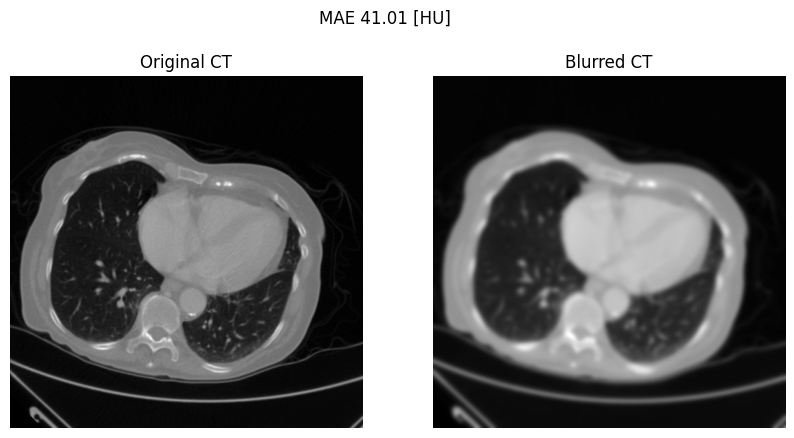

In [20]:
slice_number = -1
gaussian = sitk.SmoothingRecursiveGaussianImageFilter()
gaussian.SetSigma(float(2))
blur_ct = gaussian.Execute(ct_sitk)
blur_ct_array = sitk.GetArrayFromImage(blur_ct)

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')

img = axarr[1].imshow(np.squeeze(blur_ct_array[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Blurred CT')

apply_mae = torch.nn.L1Loss()



# Convert NumPy arrays to PyTorch tensors and specify the data type
ct_tensor = torch.tensor(ct_array[slice_number, :, :], dtype=torch.float32)
blur_ct_tensor = torch.tensor(blur_ct_array[slice_number, :, :], dtype=torch.float32)

# Calculate MAE
mae = apply_mae(ct_tensor, blur_ct_tensor).item()

# Add the MAE to the plot's title
f.suptitle(f"MAE {np.round(mae, 2)} [HU]")
plt.show()

## Structural Similarity Index Measure (SSIM)
SSIM measures the perceptual difference between two similar images. It cannot judge which of the two is better: that must be inferred from knowing which is the “original” and which has been subjected to additional processing such as data compression. Unlike PSNR (Peak Signal-to-Noise Ratio), SSIM is based on visible structures in the image. Although PSNR is only conclusively valid when it is used to compare results from the same codec (or codec type) and same content.


The resultant SSIM index is a decimal value between -1 and 1, where 1 indicates perfect similarity, 0 indicates no similarity, and -1 indicates perfect anti-correlation.

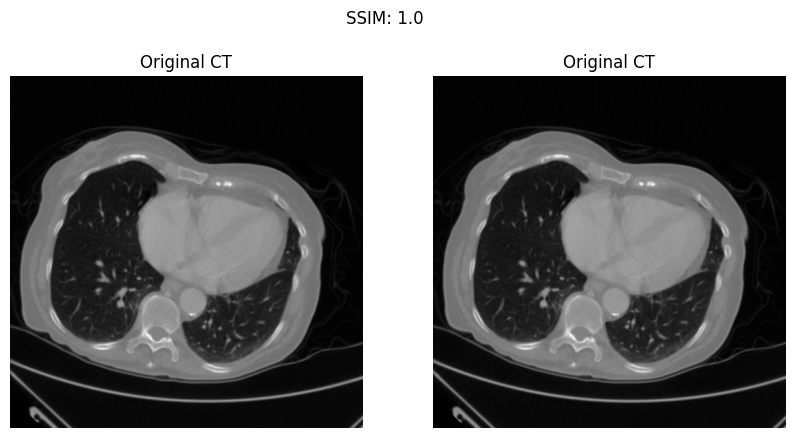

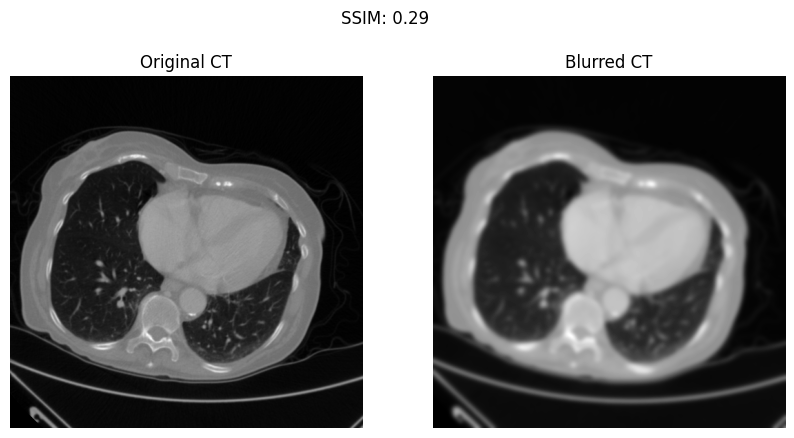

In [21]:
import pytorch_ssim
# To compute the ssim we need to bring our slices to the size 1,1,512,512
ct = torch.tensor(ct_array[slice_number,:,:],dtype=torch.float32).unsqueeze(0).unsqueeze(0)
blur_ct = torch.tensor(blur_ct_array[slice_number,:,:], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

ct_ct_ssim = pytorch_ssim.ssim(ct,ct).item()
ct_blur_ct_ssim = pytorch_ssim.ssim(ct,blur_ct).item()

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')

img = axarr[1].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Original CT')
f.suptitle(f"SSIM: {ct_ct_ssim}")

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original CT')

img = axarr[1].imshow(np.squeeze(blur_ct_array[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('Blurred CT')
f.suptitle(f"SSIM: {np.round(ct_blur_ct_ssim, 2)}")
print()


# DRR
A Digitally Reconstructed Radiograph (DRR) is a simulation of a conventional 2D x-ray image, created from computed tomography (CT) data. 

To obtain it we can simply calculate the average of the slices by squashing everything onto a two-dimensional plane.

(512, 512, 138)
(512, 512)


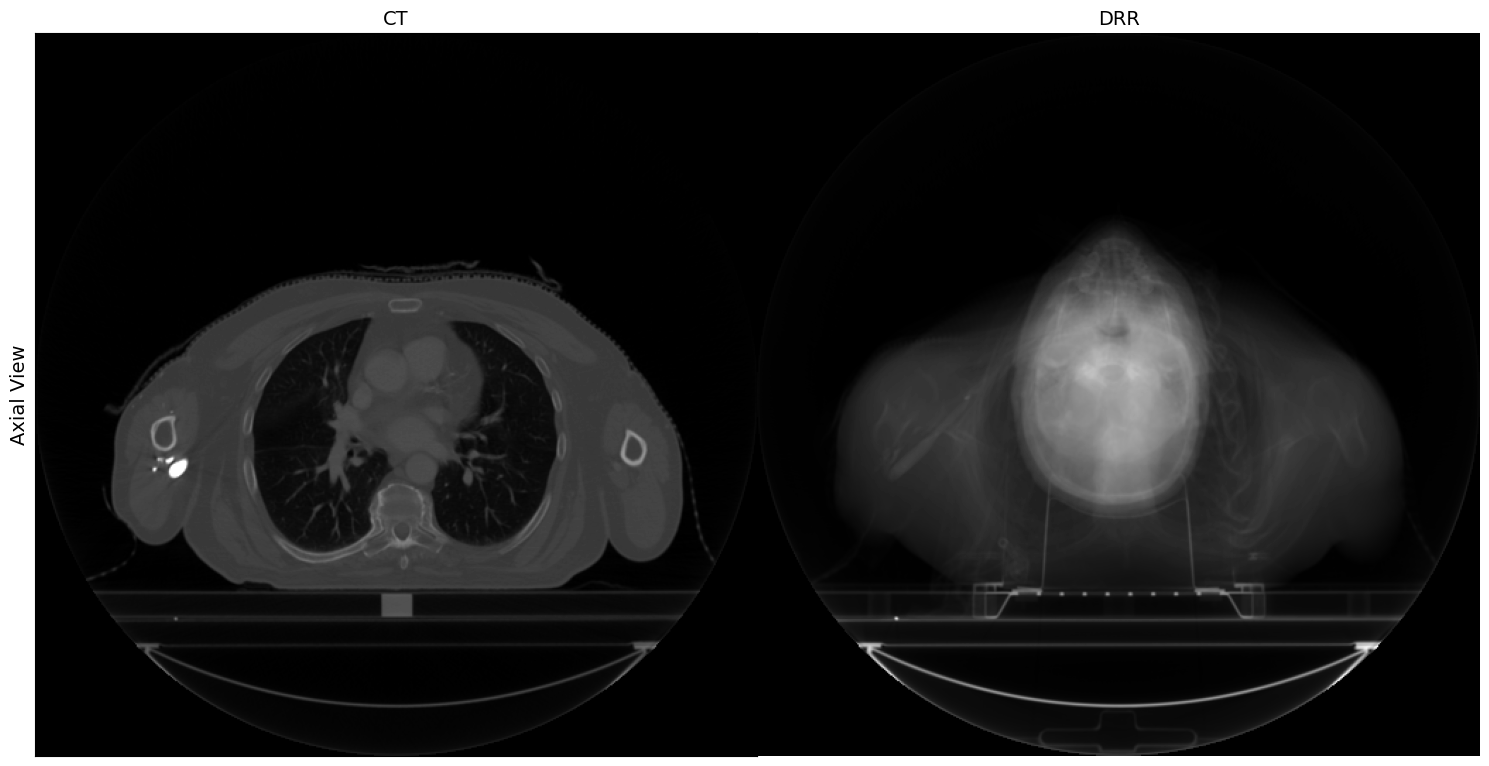

In [22]:
ct_drr_sitk  = sitk.ReadImage("./assets/PythonBasicsLecture/data/CTDRR.nrrd", sitk.sitkFloat32) # Reading CT
ct_drr_sitk = sitk.PermuteAxes(ct_drr_sitk, [0, 1, 2])
ct_drr_sitk = sitk.Flip(ct_drr_sitk, [False, True, True])  # Rotate on [Y, Z]

ct_drr_array = sitk.GetArrayFromImage(ct_drr_sitk)

print(ct_drr_sitk.GetSize())

drr_axial = np.mean(ct_drr_array, axis=0)

print(drr_axial.shape)

f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].imshow(np.squeeze(ct_drr_array[135,:,:]), cmap='gray',origin='lower')
axarr[0].set_ylabel('Axial View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(drr_axial, cmap='gray',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('DRR',fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

# Maximum Intensity Projection
A maximum intensity projection (MIP) is a method for 3D data that projects in the visualization plane the voxels with maximum intensity that fall in the way of parallel rays traced from the viewpoint to the plane of projection. 

This implies that two MIP renderings from opposite viewpoints are symmetrical images if they are rendered using orthographic projection.

Example:
<center><img src="https://lh3.googleusercontent.com/proxy/ihrwf_9nhSOtMGoYm8XHeHvF65dTSpBo2wIg7NqlN3rOnU0tnNiioG9uMlvOAcm1YeUji_wWriCDglzrQnKNY_DYH9W4_uMoYsqguuqLu7s9eA">

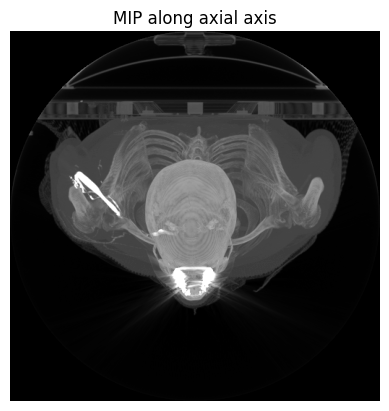

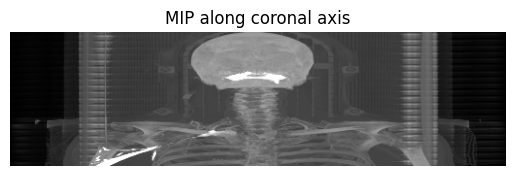

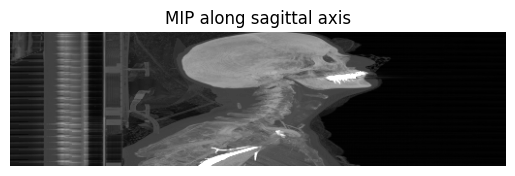

In [23]:
views = {0:"axial", 1:"coronal", 2:"sagittal"}
results = {"axial": [], "coronal": [], "sagittal": []}

for axis, view in views.items():
    # Calculate the MIP along an axis
    mip = np.max(ct_drr_array, axis=axis)
    results[view] = mip # store the result for each view


for view, result in results.items():
    plt.imshow(result, cmap='gray')
    plt.title(f"MIP along {view} axis")
    plt.axis('off') 
    plt.show()

# Histogram processing

Let's display the CT histogram

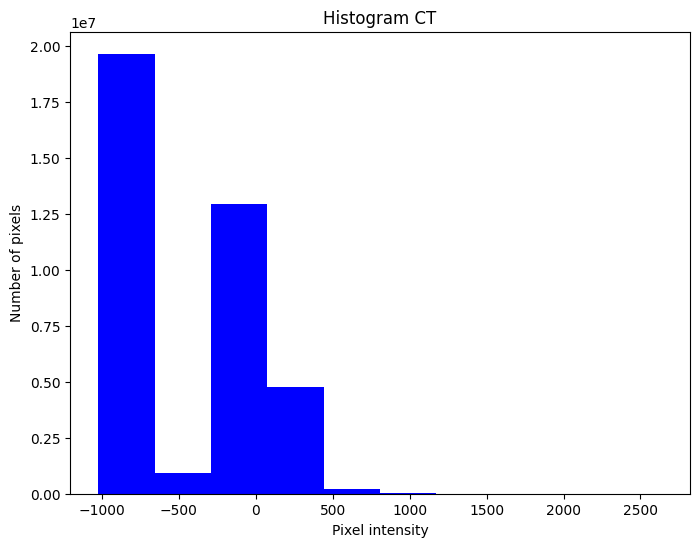

In [24]:
plt.figure(figsize=(8, 6))
plt.hist(ct_array.ravel(), color='blue')
plt.title('Histogram CT')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.show()

## Histogram equalization
Histogram equalization serves to improve the contrast of an image by distributing intensity values ​​more evenly.

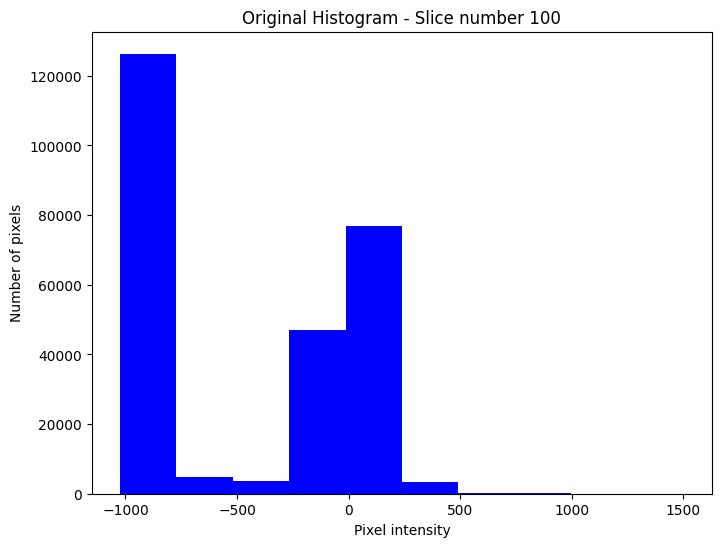

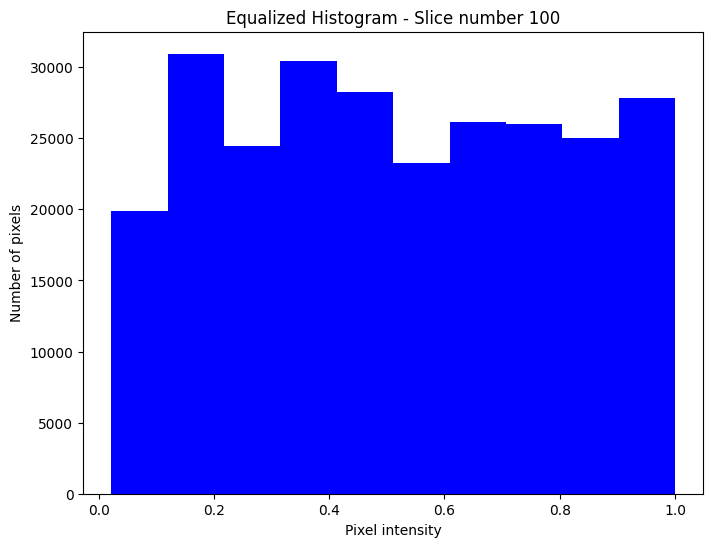

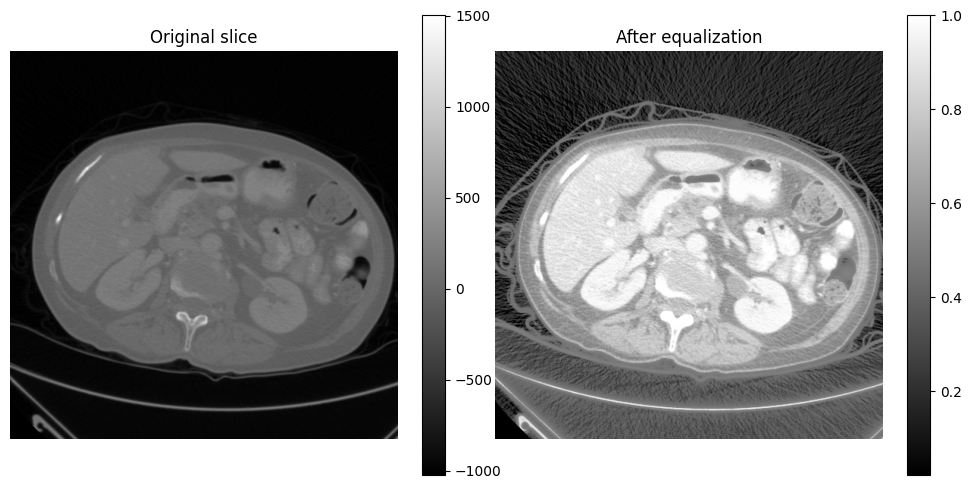

In [25]:
import skimage.exposure as exposure 

slice_number = 100

equalized_image = exposure.equalize_hist(ct_array[slice_number,:,:])

plt.figure(figsize=(8, 6))
plt.hist(ct_array[slice_number,:,:].ravel(), color='blue')
plt.title(f'Original Histogram - Slice number {slice_number}')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(equalized_image.ravel(), color='blue')
plt.title(f'Equalized Histogram - Slice number {slice_number}')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.show()

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original slice')
f.colorbar(img, ax=axarr[0])

img = axarr[1].imshow(np.squeeze(equalized_image), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('After equalization')
f.colorbar(img, ax=axarr[1])
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)


## Histogram stretching
Histogram stretching involves modifying the brightness (intensity) values of pixels in the image according to some mapping function that specifies an output pixel brightness value for each input pixel brightness value. 

0.0 1.0


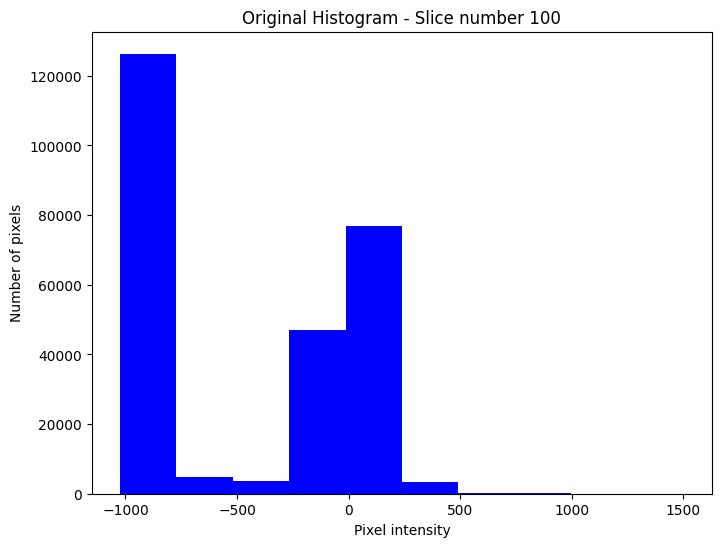

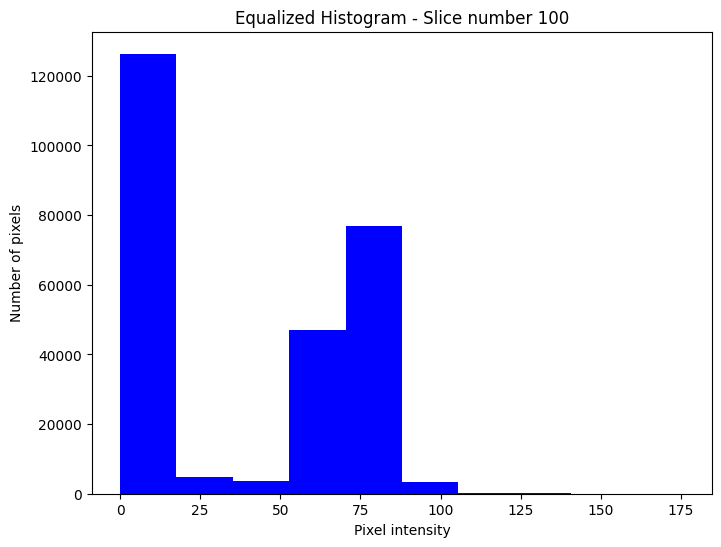

Min value: 0.0 - Max value: 255.0


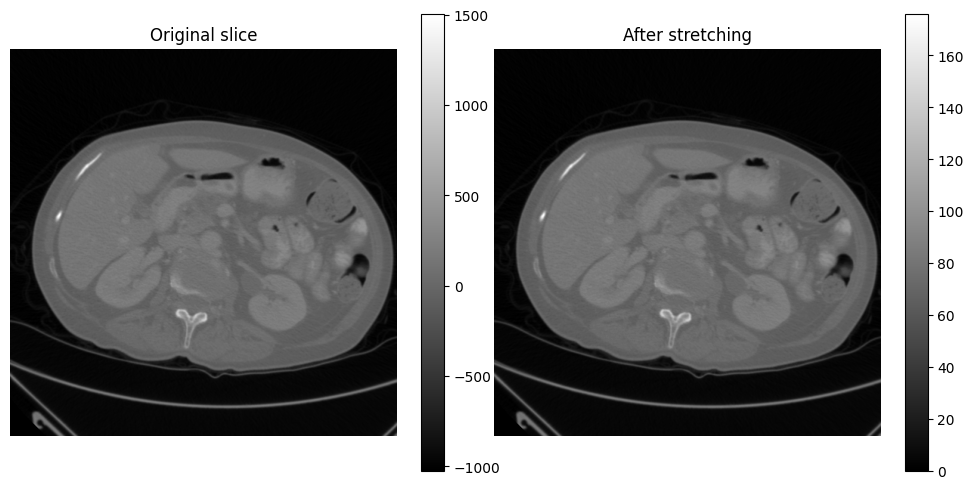

In [26]:
norm_image = (ct_array - ct_array.min()) / (ct_array.max() - ct_array.min()) # Values between 0 and 1
print(norm_image.min(), norm_image.max())

stretched_image = (norm_image - norm_image.min()) * 255 / (norm_image.max() - norm_image.min())

plt.figure(figsize=(8, 6))
plt.hist(ct_array[slice_number,:,:].ravel(), color='blue')
plt.title(f'Original Histogram - Slice number {slice_number}')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.show()

plt.figure(figsize=(8, 6))
plt.hist(stretched_image[slice_number,:,:].ravel(), color='blue')
plt.title(f'Equalized Histogram - Slice number {slice_number}')
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.show()

f, axarr = plt.subplots(1, 2, figsize=(10,5))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title('Original slice')
f.colorbar(img, ax=axarr[0])

img = axarr[1].imshow(np.squeeze(stretched_image[slice_number, :, :]), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title('After stretching')
f.colorbar(img, ax=axarr[1])
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

print(f"Min value: {stretched_image.min()} - Max value: {stretched_image.max()}")

## Gamma correction
Gamma correction aims to bridge the gap between the linear response of the image data and the nonlinear response of the eye and screen.
A mathematical curve, called a gamma curve, is applied to change the intensity values ​​of the image.
By increasing the gamma value, the image becomes darker; decreasing it, it becomes clearer.

<center><img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQeUOEOI8Msx58Hg61Wd4AefrKAWO_gB7bJNA&s"></center>

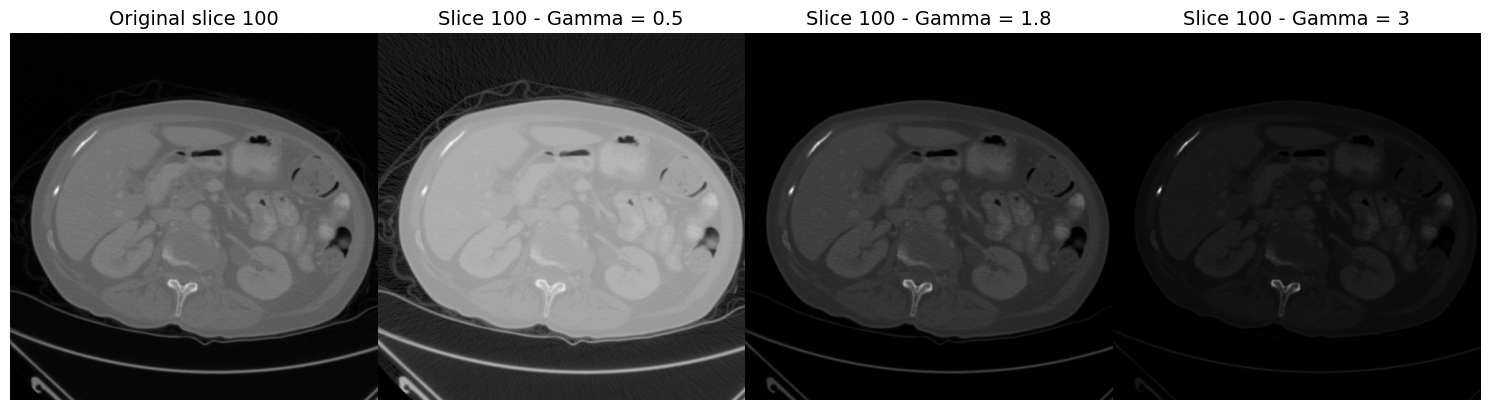

In [27]:
def gamma_correction(image_np, gamma):
    return ((image_np / image_np.max()) ** gamma) * image_np.max()

gamma_1 = 0.5
gamma_2 = 1.8
gamma_3 = 3
gamma_corrected_1 = gamma_correction(stretched_image[slice_number, :, :], gamma_1)
gamma_corrected_2 = gamma_correction(stretched_image[slice_number, :, :], gamma_2)
gamma_corrected_3 = gamma_correction(stretched_image[slice_number, :, :], gamma_3)

f, axarr = plt.subplots(1, 4, figsize=(15,15))

img = axarr[0].imshow(np.squeeze(ct_array[slice_number, :, :]), cmap='gray',origin='lower')
axarr[0].axis('off')
axarr[0].set_title(f'Original slice {slice_number}',fontsize=14)

img = axarr[1].imshow(np.squeeze(gamma_corrected_1), cmap='gray', origin='lower')
axarr[1].axis('off')
axarr[1].set_title(f'Slice {slice_number} - Gamma = {gamma_1}',fontsize=14)

img = axarr[2].imshow(np.squeeze(gamma_corrected_2), cmap='gray', origin='lower')
axarr[2].axis('off')
axarr[2].set_title(f'Slice {slice_number} - Gamma = {gamma_2}',fontsize=14)

img = axarr[3].imshow(np.squeeze(gamma_corrected_3), cmap='gray', origin='lower')
axarr[3].axis('off')
axarr[3].set_title(f'Slice {slice_number} - Gamma = {gamma_3}',fontsize=14)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

# Exercises 📚

**Exercise 1** - Create a function that uses SimpleITK to
- read a volume 
- print the volume information if needed
- save a new volume if needed

and return the numpy version of the volume.

In [28]:
def get_volume(volume_path, print_info=True, save_volume=True, name_to_save = "generic_volume", save_extension="nrrd"):
    #raise NotImplementedError()

    #1 read the volume
    volume = sitk.ReadImage(volume_path, sitk.sitkFloat32)

    #print the info 
    if print_info:
        print(f"Vol. Size: {volume.GetSize()}")
        print(f"Vol. Dimension: {volume.GetDimension()}")
        print(f"Vol. Origin: {volume.GetOrigin()}")
        print(f"Vol. Direction: {volume.GetOrigin()}")
        print(f"Vol. Number of Pixels: {volume.GetNumberOfPixels()}")

    #save volume 
    if save_volume:
        path_to_file = f"{name_to_save}.{save_extension}"
        sitk.WriteImage(volume, path_to_file)
        print(f"Vol. saved as: {path_to_file}")

    #convert vol. to numpy array 
        volume_numpy = sitk.GetArrayFromImage(volume)
        return volume_numpy
        
# apply and show the result

vol_numpy_Array = get_volume("assets/PythonBasicsLecture/data/img0001.nii.gz")

Vol. Size: (512, 512, 147)
Vol. Dimension: 3
Vol. Origin: (0.0, 0.0, 0.0)
Vol. Direction: (0.0, 0.0, 0.0)
Vol. Number of Pixels: 38535168
Vol. saved as: generic_volume.nrrd


**Exercise 2** - Create a function that creates and returns a DRR for axial, coronal and sagittal views

Size of volume: (512, 512, 138)
Axial Projection Shape: (512, 512)
Coronal Projection Shape: (138, 512)
Sagittal Projection Shape: (138, 512)


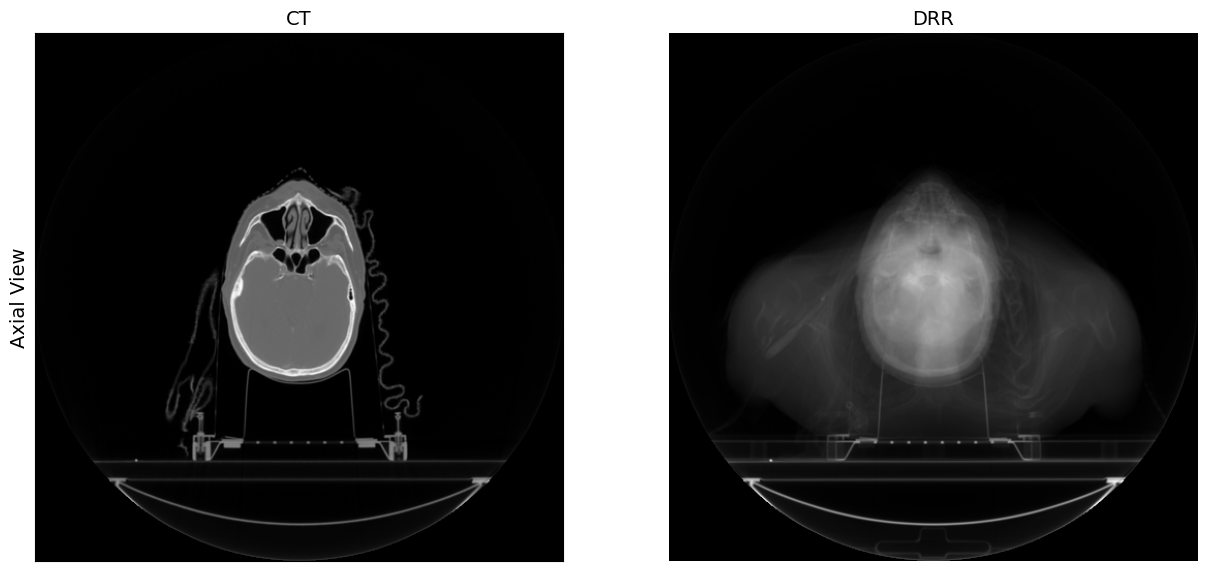

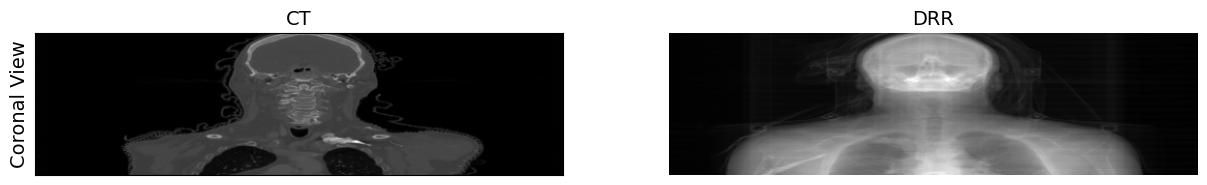

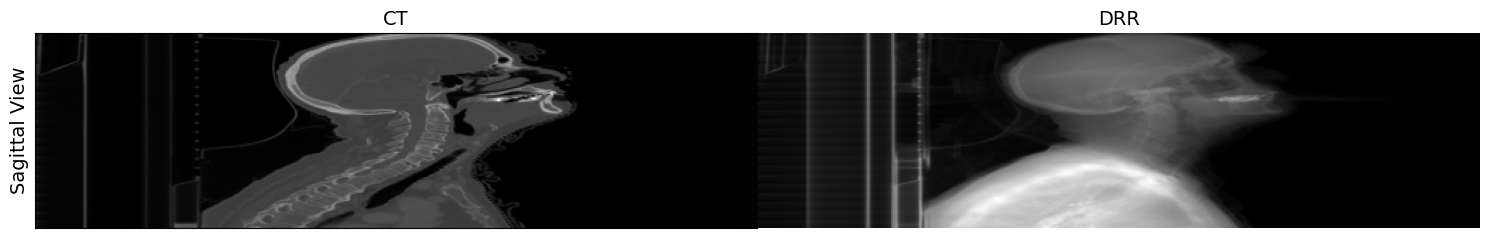

In [29]:
def get_drr(volume_path, view_axis = {"axial":0,"coronal":1,"sagittal":2}) -> dict:
    #raise NotImplementedError()

    #read the CT Volume 
    CT_DRR_volume_sitk = sitk.ReadImage(volume_path, sitk.sitkFloat32)

    CT_DRR_volume_sitk = sitk.PermuteAxes(CT_DRR_volume_sitk, [0, 1, 2])
    CT_DRR_volume_sitk = sitk.Flip(CT_DRR_volume_sitk, [False, True, False])  # Rotate on [Y, Z]

    #conv. to numpy array
    CT_DRR_volume_array = sitk.GetArrayFromImage(CT_DRR_volume_sitk)
    print(f"Size of volume: {CT_DRR_volume_sitk.GetSize()}")
    
    #create DRR's 
    DRRS = {
        "axial": np.mean(CT_DRR_volume_array, axis=0),
        "coronal": np.mean(CT_DRR_volume_array, axis=1),
        "sagittal": np.mean(CT_DRR_volume_array, axis=2)
    }

    return DRRS, CT_DRR_volume_array


# apply and show the result
DRRS, CT_DRR_volume_array = get_drr("./assets/PythonBasicsLecture/data/CTDRR.nrrd")

#indiv. projections
axial_projection = DRRS["axial"]
coronal_projection = DRRS["coronal"]
sagittal_projection = DRRS["sagittal"]


print(f"Axial Projection Shape: {axial_projection.shape}")
print(f"Coronal Projection Shape: {coronal_projection.shape}")
print(f"Sagittal Projection Shape: {sagittal_projection.shape}")

#axial
f, axarr = plt.subplots(1,2,figsize=(15,15))

slice_index_axial = 100
axial_slice = CT_DRR_volume_array[slice_index_axial, :, :]

axarr[0].imshow(axial_slice, cmap='gray',origin='lower')
axarr[0].set_ylabel('Axial View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(axial_projection, cmap='gray',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('DRR',fontsize=14)



#coronal
f, axarr = plt.subplots(1,2,figsize=(15,15))

slice_index_coronal = 280
coronal_slice = CT_DRR_volume_array[:, slice_index_coronal, :]

axarr[0].imshow(np.flip(coronal_slice,1), cmap='gray',origin='lower')
axarr[0].set_ylabel('Coronal View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(coronal_projection, cmap='gray',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('DRR',fontsize=14)



#sagittal
f, axarr = plt.subplots(1,2,figsize=(15,15))

slice_index_sagittal = 250
sagittal_slice = CT_DRR_volume_array[:, :, slice_index_sagittal]

axarr[0].imshow(sagittal_slice, cmap='gray',origin='lower')
axarr[0].set_ylabel('Sagittal View',fontsize=14)
axarr[0].set_xticks([])
axarr[0].set_yticks([])
axarr[0].set_title('CT',fontsize=14)

axarr[1].imshow(sagittal_projection, cmap='gray',origin='lower')
axarr[1].axis('off')
axarr[1].set_title('DRR',fontsize=14)


plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)


    



**Exercise 3** - Create a function that creates a minimum intensity projection 

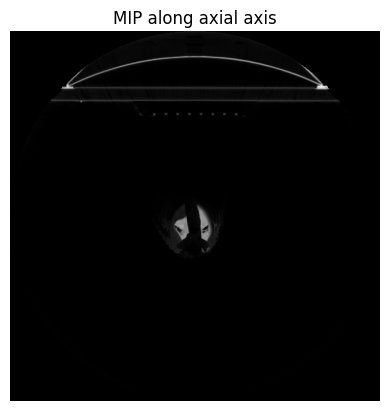

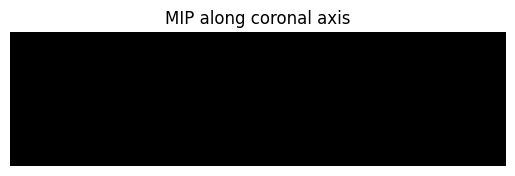

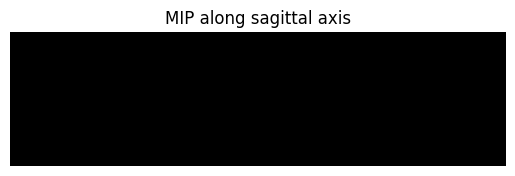

In [30]:
def min_intensity_projection(volume, views = {0:"axial", 1:"coronal", 2:"sagittal"}) -> dict:
    #raise NotImplementedError()

        #read the CT Volume 
    CT_DRR_volume_sitk = sitk.ReadImage(volume, sitk.sitkFloat32)

    CT_DRR_volume_sitk = sitk.PermuteAxes(CT_DRR_volume_sitk, [0, 1, 2])
    CT_DRR_volume_sitk = sitk.Flip(CT_DRR_volume_sitk, [False, True, True])  # Rotate on [Y, Z]

    #conv. to numpy array
    CT_DRR_volume_array = sitk.GetArrayFromImage(CT_DRR_volume_sitk)


    views = {0:"axial", 1:"coronal", 2:"sagittal"}
    results = {"axial": [], "coronal": [], "sagittal": []}

    for axis, view in views.items():
        # Calculate the MIP along an axis
        mip = np.min(CT_DRR_volume_array, axis=axis)
        results[view] = mip # store the result for each view


    for view, result in results.items():
        plt.imshow(result, cmap='gray')
        plt.title(f"MIP along {view} axis")
        plt.axis('off') 
        plt.show()
            

MIP = min_intensity_projection("./assets/PythonBasicsLecture/data/CTDRR.nrrd")



**Question 1** - Why is it important to bring CT values ​​between 0 and a positive value (i.e. [0, 1]) before applying histogram stretching?

**Answer:** 
- **1: Normalization for constant processing**
    - By normalizing values to a range eg. [0,1] further applications of processing is simplified


- **2: Improved Contrast**
    - Histogram steching redistributes pixel intensity valued to occupie a wider range thus increasing the contrast
    - If the value are not properly scaled the process may become ineffective or won't work at all

- **3: Numeric Stability**
    - If postprocessing is applied directly on the original Houndsfield units a result may be numeric instablility if value are negative or improper scaled. A definded range will reduces this risk.
 

- **4: Compabilty with further tools:**
    - Different tools (like OpenCV etc.) may require the values to be in a specific range ([0,1] or [0,255]), thus scaling ensures a compability along the variety of processing tools. 
        

# References
[fitushar - Medical Imaging Preprocessing](https://github.com/fitushar/3D-Medical-Imaging-Preprocessing-All-you-need/blob/master/Code/3DMedical-Imaging-Preprocessing-All-you-need.ipynb)

[Stretching description](https://www.olympus-lifescience.com/en/microscope-resource/primer/java/digitalimaging/processing/histogramstretching/#:~:text=Histogram%20stretching%20involves%20modifying%20the,image%2C%20this%20process%20is%20straightforward.)
